## *unsupervised learning*

### Objectives
- Preprocessing input data
- Dimensionality reduction 
- Principal Component Analysis (PCA)
 - Dimensionality reduction
 - Data Compression
 - Visualization
- Clustering
 - K-Means
 - Other clustering methods

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

## Transformations
- A very basic example is the **rescaling** of our data, which is a requirement for many machine learning algorithms. 
- There exist many different rescaling techniques, and in the following example, we will take a look at a particular method that is commonly called **standardization**.
- Here, we will recale the data so that each feature is:
 - **centered at zero** (mean = 0);
 - with **unit variance** (standard deviation = 0).

computed via the equation $x_{standardized} = \frac{x - \mu_x}{\sigma_x}$,
where $\mu$ is the sample mean, and $\sigma$ the standard deviation, respectively.

In [22]:
#example
a = np.array([1,2,3,4,5])
a_standardized = (a - a.mean()) / a.std()
print(a_standardized)

print("mean:" , a_standardized.mean())
print("std:" , a_standardized.std())

[-1.41421356 -0.70710678  0.          0.70710678  1.41421356]
mean: 0.0
std: 0.9999999999999999


### using sklearn for transformations
Although standardization is a most basic preprocessing procedure.  as we've seen in the code snipped above,  scikit-learn implements a `StandardScaler` class for this computation. 

To get some more practice with scikit-learn's "Transformer" interface, let's start by loading the iris dataset and rescale it:

In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
x , y = iris.data , iris.target
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=.25 , random_state=2)
print(x_train.shape)

(112, 4)


In [24]:
#The iris dataset is not "centered" that is it has non-zero mean and the standard deviation is different for each component.
print('mean:' , x_train.mean(axis=0))
print('standard deviation:' , x_train.std(axis=0))

mean: [5.8875     3.05       3.84553571 1.23392857]
standard deviation: [0.81340609 0.44340404 1.73348783 0.7523242 ]


In [25]:
#standardization
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

In [26]:
#fit()
#As with the classification and regression algorithms, we call fit to learn the model from the data. 
#As this is an unsupervised model, we only pass X, not y. This simply estimates mean and standard deviation.
standard_scaler.fit(x_train)

StandardScaler()

In [27]:
#trancform()
#Now we can rescale our data by applying the transform (not predict) method.
x_train_scaled = standard_scaler.transform(x_train)

In [28]:
print('mean:' , x_train_scaled.mean(axis=0))
print('standard deviation:' , x_train_scaled.std(axis=0))

mean: [1.96990242e-15 3.41393580e-15 5.96744876e-16 4.85722573e-16]
standard deviation: [1. 1. 1. 1.]


In [29]:
# It's important to note that the same transformation is applied to the training and the test set.
# That has the consequence that usually the mean of the test data is not zero after scaling.
x_test_scaled = standard_scaler.transform(x_test)
print('mean test data:' , x_test_scaled.mean(axis=0))
print('standard deviation test data:' , x_test_scaled.std(axis=0))


mean test data: [-0.21433587  0.0652844  -0.19932976 -0.18151769]
standard deviation test data: [1.04018969 0.91559884 1.04366875 1.02620647]


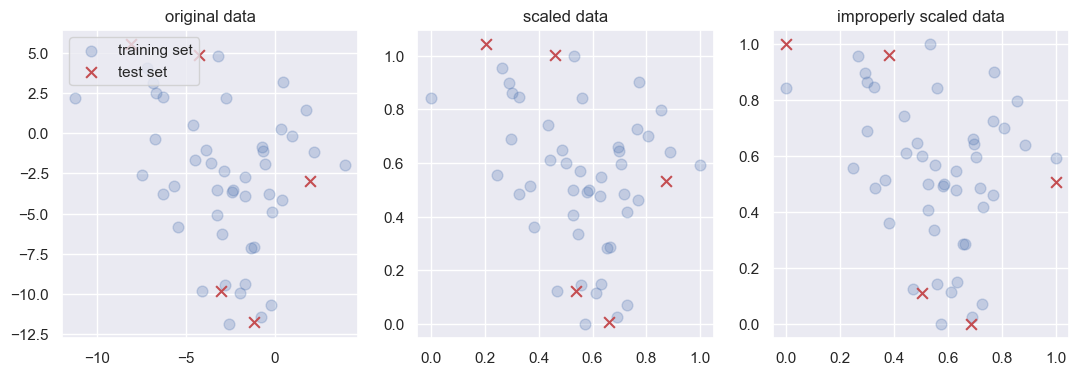

In [30]:
#It is important for the training and test data to be transformed in exactly the same way.
#for the following processing steps to make sense of the data, as is illustrated in the figure below.
from figs_folder import plot_scaling
plot_scaling.plot_relative_scaling()

#### other scalers:
- MinMaxScaler
- RobustScaler
- Normalizer

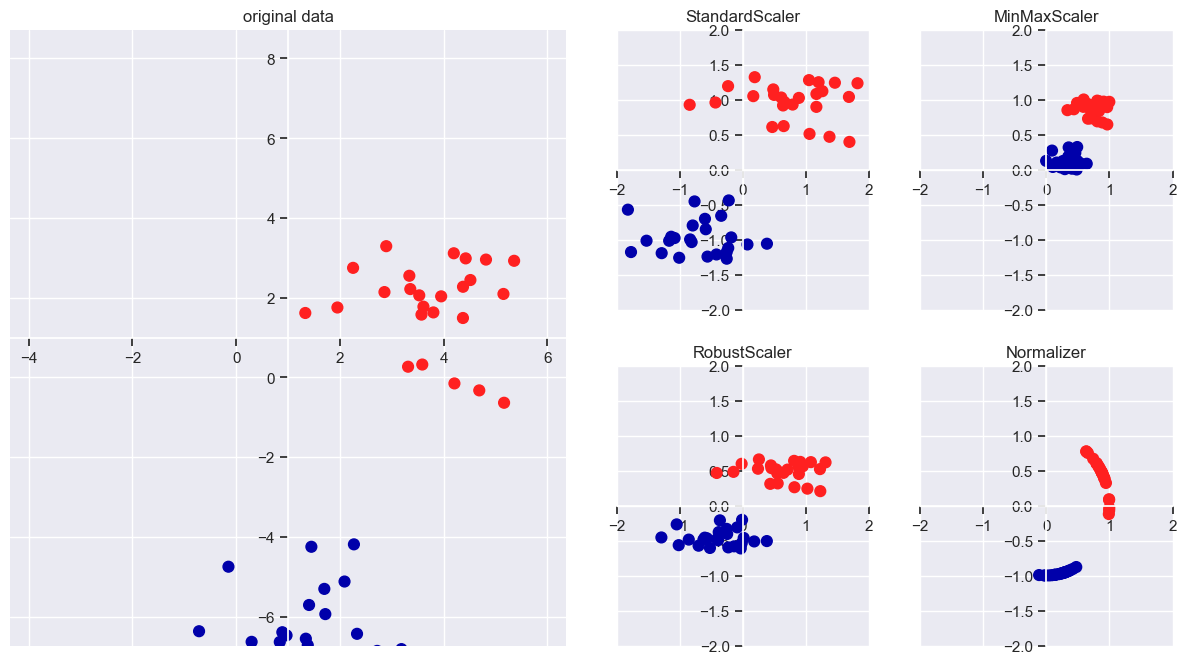

In [31]:
plot_scaling.plot_scaling()

### principal component analysis (PCA):


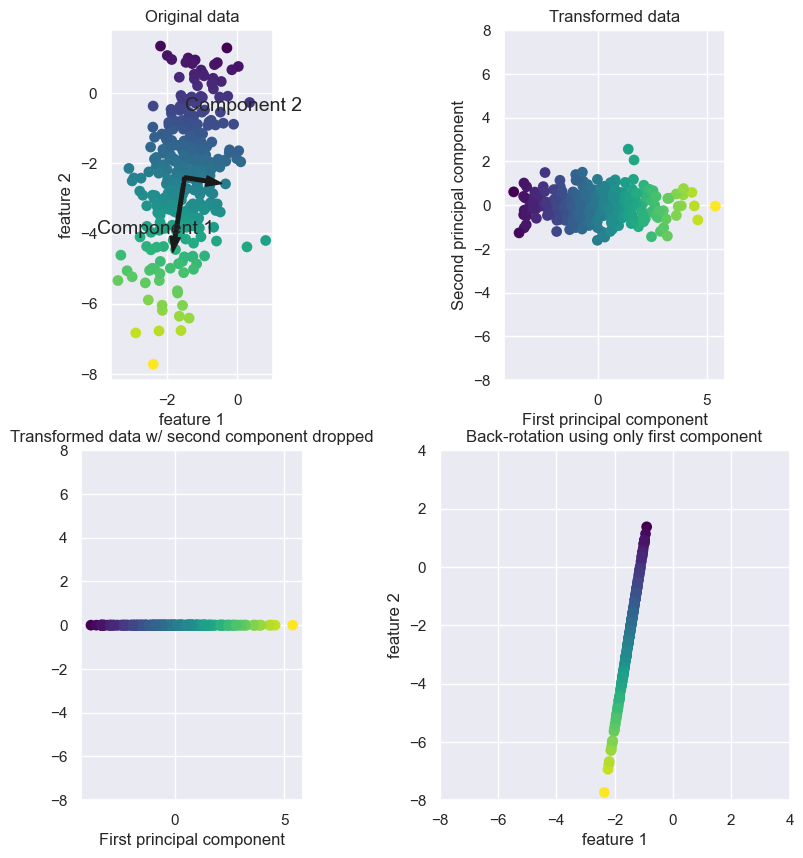

In [32]:
from figs_folder import plot_pca
plot_pca.plot_pca_illustration()

#### example use of PCA
its easiest to visualize by looking at two dimensional dataset.

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

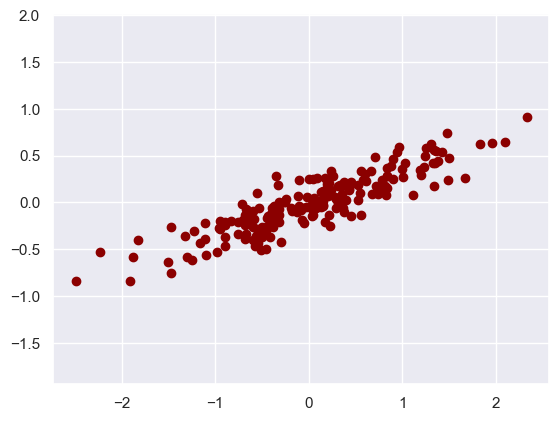

In [33]:
np.random.seed(1)
x = np.dot(np.random.random(size=(2,2)) , np.random.normal(size=(2,200)))
x = np.transpose(x)
plt.plot(x[:,0] , x[:,1] , 'o' , color='darkred')
plt.axis('equal')

We can see that there is a definite trend in the data. What PCA seeks to do is to find the **Principal Axes** in the data, and explain how important those axes are in describing the data distribution:

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)
print('pca.explained_variance_' , pca.explained_variance_)
print('pca.components_' , pca.components_)

pca.explained_variance_ [0.7625315 0.0184779]
pca.components_ [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [35]:
v1 = pca.components_[:,0]
v2 = pca.components_[:,1]
print(v1)
print(v2)
print(np.dot(v1,v2))

[-0.94446029 -0.32862557]
[-0.32862557  0.94446029]
0.0


In [36]:
print(np.linalg.norm(v1))
print(np.linalg.norm(v2))

1.0
1.0


To see what these numbers mean, let's view them as vectors plotted on top of the data:

(-2.7292712056271964,
 2.5702744393352615,
 -0.9497608386363482,
 1.0052301483776815)

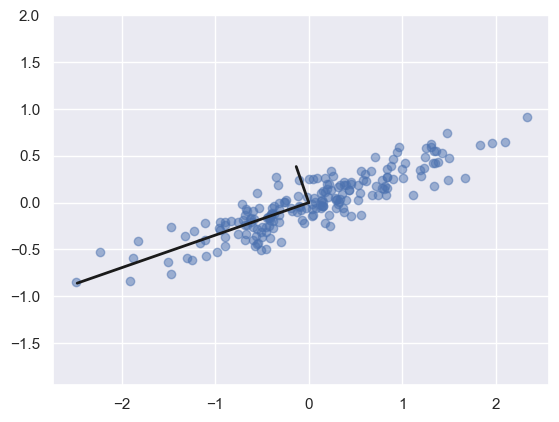

In [37]:
plt.plot(x[:,0] , x[:,1] , 'o' , alpha=.5)
for length , vector in zip(pca.explained_variance_ , pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0 , v[0]] , [0 , v[1]] , 'k' , lw= 2)
plt.axis('equal')

Notice that one vector is longer than the other. In a sense, this tells us that that direction in the data is somehow more "important" than the other direction.
The explained variance quantifies this measure of "importance" in direction.

Another way to think of it is that the second principal component could be **completely ignored** without much loss of information! Let's see what our data look like if we only keep 95% of the variance:

In [38]:
clf = PCA(0.95)  #keep 95% of variance
x_trans = clf.fit_transform(x)
print('x.shape= ' , x.shape)
print('x_tranc.shape= ' , x_trans.shape)

x.shape=  (200, 2)
x_tranc.shape=  (200, 1)


By specifying that we want to throw away 5% of the variance, the data is now compressed by a factor of 50%! Let's see what the data look like after this compression:

(-2.731158226766438, 2.609901883259332, -0.9672765706389316, 1.006064230853995)

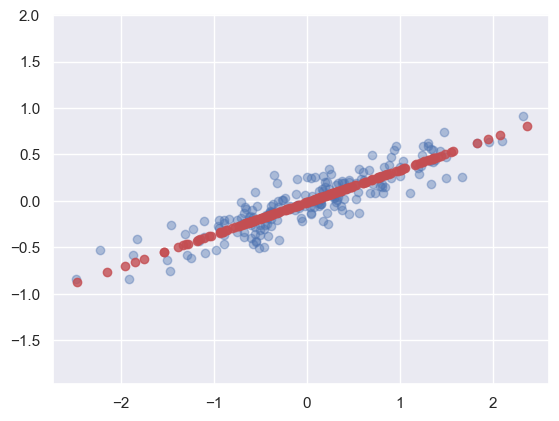

In [39]:
x_new = clf.inverse_transform(x_trans)
plt.plot(x[:,0] , x[:,1] , 'o' , alpha=.4)
plt.plot(x_new[:,0] , x_new[:,1] , 'ro' , alpha=.8)
plt.axis('equal')

The light points are the original data, while the dark points are the projected version.  We see that after truncating 5% of the variance of this dataset and then reprojecting it, the "most important" features of the data are maintained, and we've compressed the data by 50%!

This is the sense in which "dimensionality reduction" works: if you can approximate a data set in a lower dimension, you can often have an easier time visualizing it or fitting complicated models to the data.

### Application of PCA to Digits for Visualization

The dimensionality reduction might seem a bit abstract in two dimensions, but the projection and dimensionality reduction can be extremely useful when visualizing high-dimensional data.

from sklearn.datasets import load_digits
digits = load_digits()
print(len(digits.feature_names))
x , y =digits.data , digits.target
print('x.shape= ' , x.shape)

In [40]:
from sklearn.datasets import load_digits
digits = load_digits()
x = digits.data
y = digits.target
print('number of features= ' , len(digits.feature_names))
print('features= ' , digits.feature_names)
print(X.shape)

number of features=  64
features=  ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


NameError: name 'X' is not defined

In [ ]:
#project from 64 to 2 dimensions
pca = PCA(n_components=2)
x_proj = pca.fit_transform(x)
print('x_proj.shape=' , x_proj.shape)

x_proj.shape= (1797, 2)


C:\Users\mahmo\AppData\Local\Temp\ipykernel_7112\2683373817.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(x_proj[:,0] , x_proj[:,1] , c=y , edgecolors='none' , alpha=.5 , cmap=plt.cm.get_cmap('nipy_spectral', 10))


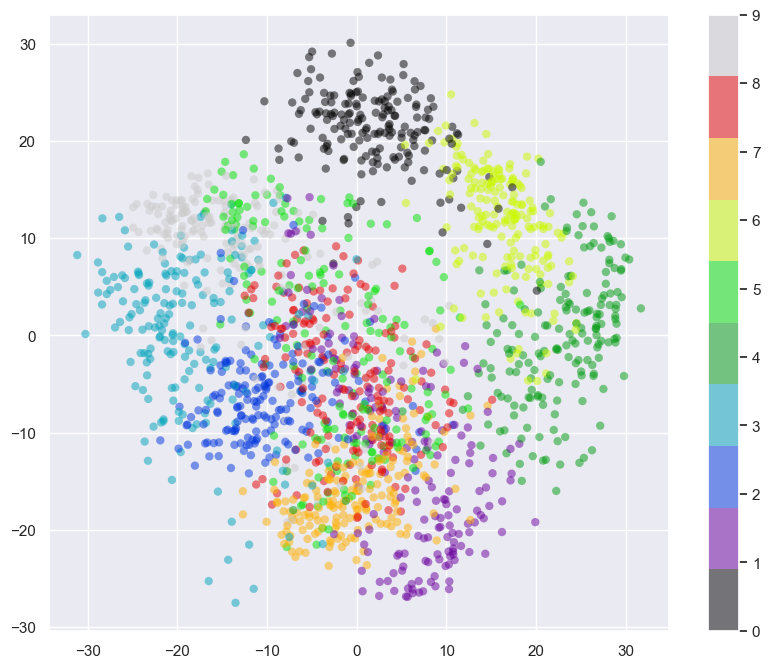

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x_proj[:,0] , x_proj[:,1] , c=y , edgecolors='none' , alpha=.5 , cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()

This gives us an idea of the relationship between the digits. Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits, **without reference** to the labels.

### Choosing the Number of Components

But how much information have we thrown away?  We can figure this out by looking at the **explained variance** as a function of the components:

Text(0, 0.5, 'cumulative explained variance')

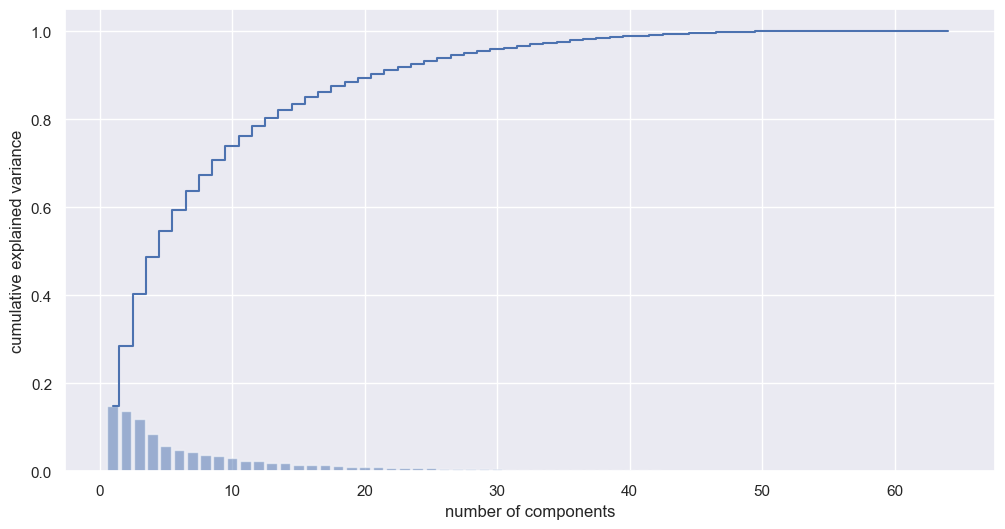

In [ ]:
sns.set()
plt.figure(figsize=(12,6))

pca = PCA().fit(x)

plt.bar(range(1, len(pca.explained_variance_ratio_) + 1) , pca.explained_variance_ratio_ , alpha=0.5 , align='center')
plt.step(range(1, len(pca.explained_variance_ratio_) + 1) , np.cumsum(pca.explained_variance_ratio_) , where='mid')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance.  Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

### PCA as data compression

As we mentioned, PCA can be used for is a sort of data compression. Using a small ``n_components`` allows you to represent a high dimensional point as a sum of just a few principal vectors.

Here's what a single digit looks like as you change the number of components:

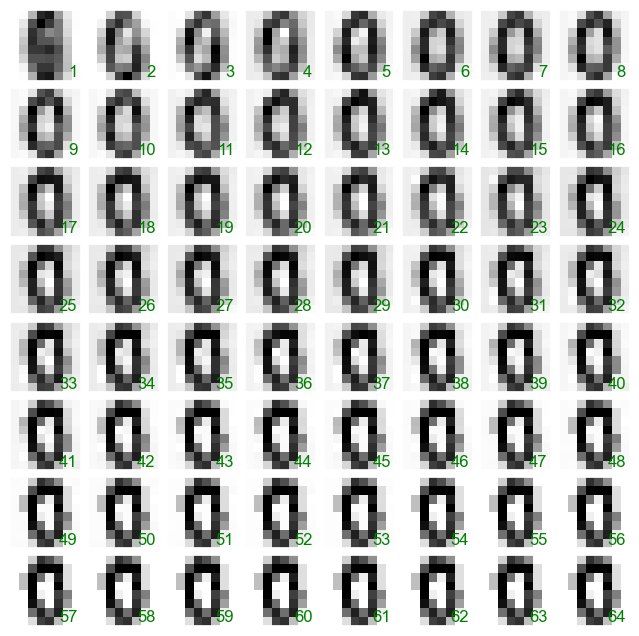

In [ ]:
fig , axes = plt.subplots(8,8,figsize=(8,8))
fig.subplots_adjust(hspace=0.1 , wspace=.1)

for i , ax in enumerate(axes.flat):
    pca = PCA(i+1).fit(x)
    im = pca.inverse_transform(pca.transform(x[20:21]))

    ax.imshow(im.reshape((8,8)) , cmap='binary')
    ax.text(0.95 , 0.05 , '{0}'.format(i + 1) , ha='right' , transform=ax.transAxes , color='green')
    ax.set_xticks([])
    ax.set_yticks([])


## Unsupervised Learning: Clustering


(100, 2)


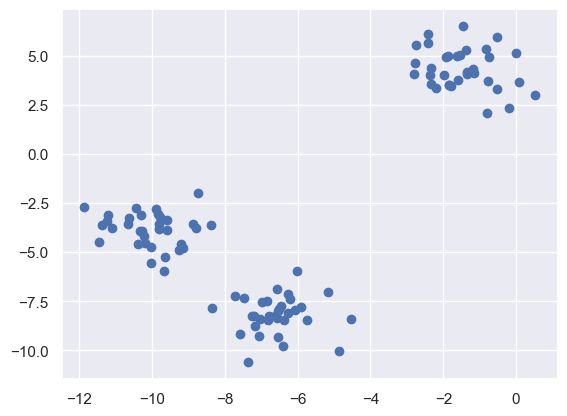

In [46]:
from sklearn.datasets import make_blobs
x , y = make_blobs(random_state=1)
print(x.shape)
plt.scatter(x[:,0] , x[:,1])

## K Means Clustering

In [47]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3 , random_state=1)

### getting cluster labels
- We can get the cluster labels either by calling fit and then accessing the ``labels_`` attribute of the K means estimator, or 
- by calling ``fit_predict``.

Either way, the result contains the ID of the cluster that each point is assigned to.


In [48]:
labels = kmeans.fit_predict(x)
print(labels)

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


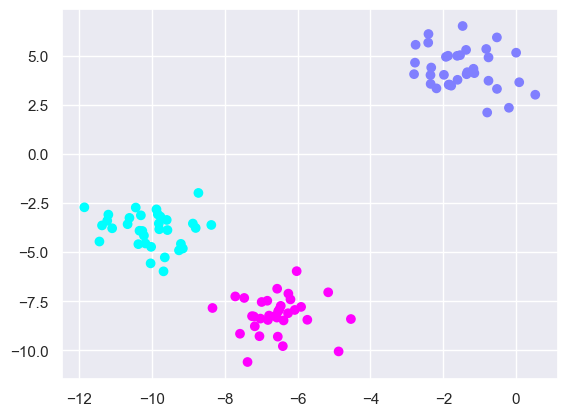

In [49]:
plt.scatter(x[:,0] , x[:,1] , cmap= plt.cm.cool , c= labels)

### choosing number of clusters

- One of the "short-comings" of K-means is that we have to specify the number of clusters, which we often don't know *apriori*. 
- For example, let's have a look what happens if we set the number of clusters to 2 in our synthetic 3-blob dataset:

[[-8.31566014 -6.01596717]
 [-1.4710815   4.33721882]]


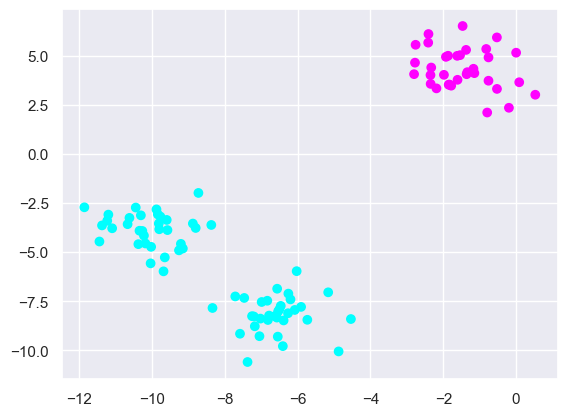

In [59]:
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], cmap=plt.cm.cool, c=labels)
print(kmeans.cluster_centers_)